### Loading in dependencies and defining machine learning function to automate the process of running models and obtaining performance metrics.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_recall_fscore_support,classification_report,confusion_matrix,ConfusionMatrixDisplay, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
import pickle5 as pickle
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns


def machine_learn(algorithm, X_train, X_test, y_train, y_test, algo_name="unknown"):
    
    
    
    #Fitting and predicting starts here
    algorithm.fit(X_train, y_train)
    preds = algorithm.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, algorithm.predict_proba(X_test)[:,1])
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    preds_best_cutoff = pd.Series(preds).apply(lambda x: 1 if x > best_thresh else 0)
    preds_best_cutoff = preds_best_cutoff.tolist()
    a_score = accuracy_score(y_test, preds_best_cutoff)
    auc_value = roc_auc_score(y_test, preds_best_cutoff)
    print(classification_report(y_test,preds_best_cutoff))
    print("It has accuracy of {} AUC of {}".format(a_score,auc_value))
    
    
    #confusion matrix
    cm = confusion_matrix(y_test, preds_best_cutoff, labels=[0,1])
    print(cm)
    return fpr, tpr, auc_value
   
def plotImp(model, X , num = 20):
    feature_imp = pd.DataFrame(sorted(zip(model.feature_importance(),X.columns)), 
                               columns=['Value','Feature'])
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    print(feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-{}.png'.format(num))

### Loading in and cleaning data set: The data set contains all of the NBA draft combine measurements for all players from 2000 to 2019 as well as their four-year-average Box Plus Minus (BPM). We would like to predict if a player's four-year-average BPM is >= 4 or <4. A BPM >= to 4 indicate the player is an All-Star consideration.

In [2]:
four_years_df = pd.read_pickle("cleaned_df.pkl")
four_years_df = four_years_df[four_years_df['MP']>250]
four_years_df = four_years_df.drop(['POS','Name','YEAR','Season','through_4_years','WITH SHOES','MP'],axis=1)
four_years_df = pd.get_dummies(four_years_df)
# Setting Avg_BPM >=0 as 1, and < 0 as 0
four_years_df['Avg_BPM'] = (four_years_df['Avg_BPM'] >= 4).astype(int)
#setting first year BPM >=0 as 1, and < 0 as 0.
four_years_df['BPM'] = (four_years_df['BPM'] >= 4).astype(int)

###  Train-test split four - year average

In [3]:
train, test = train_test_split(four_years_df, test_size=0.3, random_state=42, stratify=four_years_df['Avg_BPM'])

print("Upsampling training...")  
ros = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = ros.fit_resample(train.drop(['BPM','Avg_BPM'],axis=1), train['Avg_BPM'])
X_test = test.copy(deep=True).drop(['BPM','Avg_BPM'], axis=1)
y_test = test['Avg_BPM']
assert X_test.shape[0] == y_test.shape[0], "wrong shapes for test set"
assert X_train.shape[0] == y_train.shape[0], "wrong shapes for training set"


Upsampling training...


#### This part standarizes certain continues varaibles. This is important for algorithims like KNN and MLP.

### Predicting four year average

C:\Users\kylek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kylek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kylek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kylek\anaconda3\lib\site-packages\sklearn\metr

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       161
           1       0.00      0.00      0.00         2

    accuracy                           0.99       163
   macro avg       0.49      0.50      0.50       163
weighted avg       0.98      0.99      0.98       163

It has accuracy of 0.9877300613496932 AUC of 0.5
[[161   0]
 [  2   0]]
Done with NB
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       161
           1       0.00      0.00      0.00         2

    accuracy                           0.99       163
   macro avg       0.49      0.50      0.50       163
weighted avg       0.98      0.99      0.98       163

It has accuracy of 0.9877300613496932 AUC of 0.5
[[161   0]
 [  2   0]]
Done with rf


C:\Users\kylek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kylek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kylek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       161
           1       0.00      0.00      0.00         2

    accuracy                           0.99       163
   macro avg       0.49      0.50      0.50       163
weighted avg       0.98      0.99      0.98       163

It has accuracy of 0.9877300613496932 AUC of 0.5
[[161   0]
 [  2   0]]
Done with adBoost
              precision    recall  f1-score   support

           0       0.96      0.31      0.47       161
           1       0.00      0.00      0.00         2

    accuracy                           0.31       163
   macro avg       0.48      0.16      0.23       163
weighted avg       0.95      0.31      0.46       163

It has accuracy of 0.3067484662576687 AUC of 0.15527950310559008
[[ 50 111]
 [  2   0]]
Starting training...
[1]	valid_0's l2: 0.227872	valid_0's l1: 0.477257	valid_0's binary_logloss: 0.648854
Training until validation scores don't improve for 5 rounds
[2

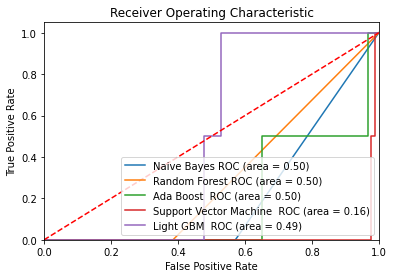

In [4]:
plt.figure()

bayes = GaussianNB()
fpr, tpr, auc = machine_learn(bayes, X_train, X_test, y_train, y_test, "NaiveBayes")
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ("Naive Bayes", auc))
print("Done with NB")

rf = RandomForestClassifier()
fpr, tpr, auc = machine_learn(rf, X_train, X_test, y_train, y_test, "RandomForest")
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ("Random Forest", auc))
print("Done with rf")

adBoost = AdaBoostClassifier()
fpr, tpr, auc = machine_learn(adBoost, X_train, X_test, y_train, y_test, "AdaBoost")      
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ("Ada Boost ", auc))
print("Done with adBoost")

svc =SVC(probability=True)
fpr, tpr, auc = machine_learn(svc, X_train, X_test, y_train, y_test, "SVC")      
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ("Support Vector Machine ", auc))

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'l2', 'l1', "binary"},
  #  'metric': None,
    'num_leaves': 100,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 50,
    'verbose': -1
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
             # feval=lgb_precision,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)




print('Starting predicting...')
# predict
preds_proba = gbm.predict(X_test, num_iteration=gbm.best_iteration) 
fpr, tpr, thresholds = metrics.roc_curve(y_test,preds_proba)
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
preds_best_cutoff = pd.Series(preds_proba).apply(lambda x: 1 if x > best_thresh else 0)
preds_best_cutoff = preds_best_cutoff.tolist()
a_score = accuracy_score(y_test, preds_best_cutoff)
auc_value = roc_auc_score(y_test, preds_best_cutoff)
print(classification_report(y_test,preds_best_cutoff))
print("It has accuracy of {} AUC of {}".format(a_score,auc_value))
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ("Light GBM ", auc_value))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


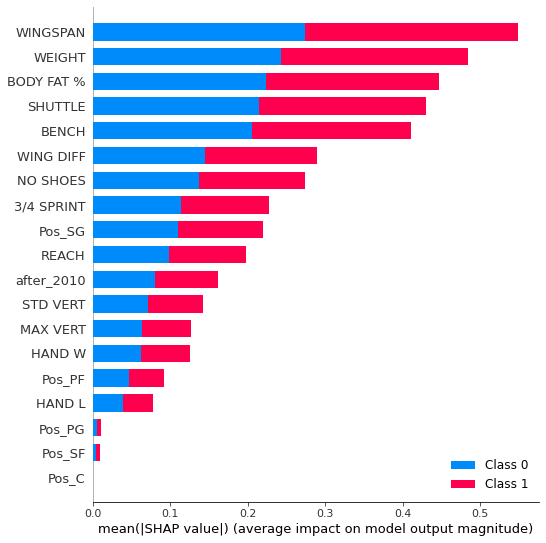

In [78]:
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

###  Train-test split first year BPM

In [5]:
train, test = train_test_split(four_years_df, test_size=0.3, random_state=42, stratify=four_years_df['BPM'])

print("Upsampling training...")  
ros = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = ros.fit_resample(train.drop(['BPM','Avg_BPM'],axis=1), train['BPM'])
X_test = test.copy(deep=True).drop(['BPM','Avg_BPM'], axis=1)
y_test = test['BPM']
assert X_test.shape[0] == y_test.shape[0], "wrong shapes for test set"
assert X_train.shape[0] == y_train.shape[0], "wrong shapes for training set"

Upsampling training...


### Predicting first-year BPM

C:\Users\kylek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kylek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kylek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kylek\anaconda3\lib\site-packages\sklearn\metr

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       162
           1       0.00      0.00      0.00         1

    accuracy                           0.99       163
   macro avg       0.50      0.50      0.50       163
weighted avg       0.99      0.99      0.99       163

It has accuracy of 0.9938650306748467 AUC of 0.5
[[162   0]
 [  1   0]]
Done with NB
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       162
           1       0.00      0.00      0.00         1

    accuracy                           0.99       163
   macro avg       0.50      0.50      0.50       163
weighted avg       0.99      0.99      0.99       163

It has accuracy of 0.9938650306748467 AUC of 0.5
[[162   0]
 [  1   0]]
Done with rf
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       162
           1       0.00      0.00      0.00         1

    accuracy

C:\Users\kylek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kylek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kylek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


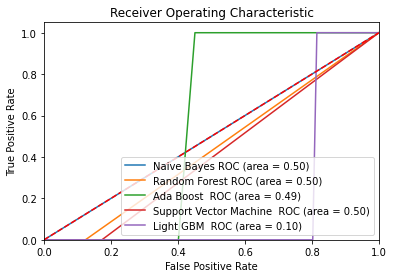

In [6]:
plt.figure()

bayes = GaussianNB()
fpr, tpr, auc = machine_learn(bayes, X_train, X_test, y_train, y_test, "NaiveBayes")
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ("Naive Bayes", auc))
print("Done with NB")

rf = RandomForestClassifier()
fpr, tpr, auc = machine_learn(rf, X_train, X_test, y_train, y_test, "RandomForest")
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ("Random Forest", auc))
print("Done with rf")

adBoost = AdaBoostClassifier()
fpr, tpr, auc = machine_learn(adBoost, X_train, X_test, y_train, y_test, "AdaBoost")      
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ("Ada Boost ", auc))
print("Done with adBoost")

svc =SVC(probability=True)
fpr, tpr, auc = machine_learn(svc, X_train, X_test, y_train, y_test, "SVC")      
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ("Support Vector Machine ", auc))

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'l2', 'l1', "binary"},
  #  'metric': None,
    'num_leaves': 100,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 50,
    'verbose': -1
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
             # feval=lgb_precision,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)




print('Starting predicting...')
# predict
preds_proba = gbm.predict(X_test, num_iteration=gbm.best_iteration) 
fpr, tpr, thresholds = metrics.roc_curve(y_test,preds_proba)
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
preds_best_cutoff = pd.Series(preds_proba).apply(lambda x: 1 if x > best_thresh else 0)
c = preds_best_cutoff.tolist()
a_score = accuracy_score(y_test, preds_best_cutoff)
auc_value = roc_auc_score(y_test, preds_best_cutoff)
print(classification_report(y_test,preds_best_cutoff))
print("It has accuracy of {} AUC of {}".format(a_score,auc_value))
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ("Light GBM ", auc_value))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

    Value     Feature
18    113    NO SHOES
17     98      WEIGHT
16     78  BODY FAT %
15     72    WINGSPAN
14     37       REACH
13     27    MAX VERT
12     25    STD VERT
11     18   WING DIFF
10     16  3/4 SPRINT
9      14       BENCH
8       8      HAND L
7       4      HAND W
6       3  after_2010
5       2      Pos_SG
4       2      Pos_PG
3       1     SHUTTLE
1       0      Pos_PF
2       0      Pos_SF
0       0       Pos_C


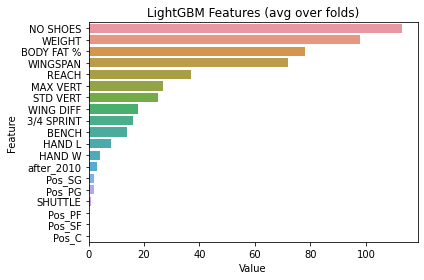

In [7]:
plotImp(gbm, X_train, num=20)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


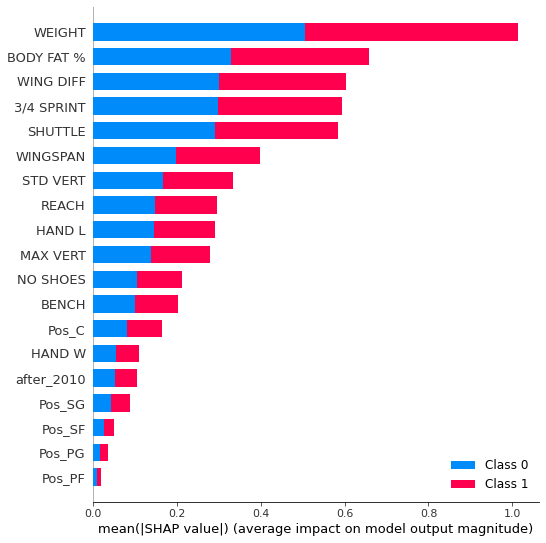

In [70]:
import shap
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

### Loading in 2020 draft as time hold-out-test set

In [71]:
test_2021 = pd.read_pickle("2021_test.pkl")
test_2021 = test_2021[test_2021['MP']>250]
test_2021 = test_2021.drop(['Name','Season','through_4_years','MP'],axis=1)
test_2021 = pd.get_dummies(test_2021)
# Setting Avg_BPM >=0 as 1, and < 0 as 0
test_2021['Avg_BPM'] = (test_2021['Avg_BPM'] >= 0).astype(int)
#setting first year BPM >=0 as 1, and < 0 as 0.
test_2021['BPM'] = (test_2021['BPM'] >= 0).astype(int)

In [74]:
print("Upsampling training...")  
ros = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = ros.fit_resample(four_years_df.drop(['BPM','Avg_BPM'],axis=1), four_years_df['BPM'])
X_test = test_2021.copy(deep=True).drop(['BPM','Avg_BPM'], axis=1)
y_test = test_2021['BPM']

Upsampling training...


In [75]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'l2', 'l1', "binary"},
  #  'metric': None,
    'num_leaves': 100,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 50,
    'verbose': -1
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
             # feval=lgb_precision,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)




print('Starting predicting...')
# predict
preds_proba = gbm.predict(X_test, num_iteration=gbm.best_iteration) 
fpr, tpr, thresholds = metrics.roc_curve(y_test,preds_proba)
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
preds_best_cutoff = pd.Series(preds_proba).apply(lambda x: 1 if x > best_thresh else 0)
preds_best_cutoff = preds_best_cutoff.tolist()
a_score = accuracy_score(y_test, preds_best_cutoff)
auc_value = roc_auc_score(y_test, preds_best_cutoff)
print(classification_report(y_test,preds_best_cutoff))
print("It has accuracy of {} AUC of {}".format(a_score,auc_value))

Starting training...
[1]	valid_0's l1: 0.491495	valid_0's binary_logloss: 0.676931	valid_0's l2: 0.241898
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 0.488966	valid_0's binary_logloss: 0.671937	valid_0's l2: 0.239414
[3]	valid_0's l1: 0.47019	valid_0's binary_logloss: 0.636571	valid_0's l2: 0.221801
[4]	valid_0's l1: 0.467972	valid_0's binary_logloss: 0.632684	valid_0's l2: 0.219923
[5]	valid_0's l1: 0.450464	valid_0's binary_logloss: 0.601326	valid_0's l2: 0.204444
[6]	valid_0's l1: 0.454024	valid_0's binary_logloss: 0.607752	valid_0's l2: 0.207697
[7]	valid_0's l1: 0.459297	valid_0's binary_logloss: 0.618277	valid_0's l2: 0.213057
[8]	valid_0's l1: 0.460782	valid_0's binary_logloss: 0.621618	valid_0's l2: 0.214795
[9]	valid_0's l1: 0.464292	valid_0's binary_logloss: 0.63014	valid_0's l2: 0.219268
[10]	valid_0's l1: 0.46843	valid_0's binary_logloss: 0.640768	valid_0's l2: 0.224844
Early stopping, best iteration is:
[5]	valid_0's l1: 0.450464	valid_0's